In [1]:
# Imports

import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [2]:
# Accessing Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset

#df = pd.read_excel('/content/drive/My Drive/Datathon/Data/Cleaned_Projects.xlsx')
df = pd.read_csv('/content/drive/My Drive/Datathon/Data/mydata.csv')
df = df.drop(df.columns[[0]], axis=1)

print(df.shape)
df.head()

(3240, 58)


,Fund,Fund Type,Country,World Bank Region,Income Classification,Name of Project,Theme/Objective,Sector (OECD),Implementing Agency,Recipient Institution,...,World Bank Region_Not applicable,World Bank Region_South Asia,World Bank Region_Sub-Saharan Africa,World Bank Region_Western Asia,Income Classification_High income,Income Classification_Low income,Income Classification_Lower middle income,Income Classification_Not applicable,Income Classification_Upper middle income,categories
0,Green Climate Fund (GCF),Multilateral,Sri Lanka,South Asia,Lower middle income,(fp124) strengthening climate resilience of su...,Adaptation,Infrastructure,International Union for Conservation of Nature...,Ministry of Environment,...,0,1,0,0,0,0,1,0,0,"Detection, Observation, Monitoring, Analysis &..."
1,Global Environment Facility (GEF),Multilateral,India,South Asia,Lower middle income,accelerating adoption of super-efficient techn...,Multiple Foci,Energy,UNDP,"Bureau of Energy Efficiency, Ministry of Power...",...,0,1,0,0,0,0,1,0,0,"Detection, Observation, Monitoring, Analysis &..."
2,Global Environment Facility (GEF),Multilateral,India,South Asia,Lower middle income,achieving reduction in ghg emissions through a...,Mitigation - General,Energy,UNDP,0,...,0,1,0,0,0,0,1,0,0,User Interface
3,Least Developed Countries Fund (LDCF),Multilateral,Afghanistan,South Asia,Low income,adapting afghan communities to climate-induced...,Adaptation,Disaster Prevention & Preparedness,UNDP,"NEPA, MRRD, MAIL, ANDMA, Afghan Met Office, Mo...",...,0,1,0,0,0,1,0,0,0,Disaster risk knowledge and management
4,Least Developed Countries Fund (LDCF),Multilateral,Bhutan,South Asia,Lower middle income,addressing the risk of climate-induced disaste...,Adaptation,Disaster Prevention & Preparedness,UNDP,National Environment Comission Secretariat,...,0,1,0,0,0,0,1,0,0,Provision and application of climate services


In [4]:
cols = ['Amount of Funding Approved (USD millions)'] # one or more

Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.90)
IQR = Q3 - Q1

#df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(len(df) - len(df2))

In [5]:
df = df[df['Approved year'] != 0]

for i,v in enumerate(df.columns):
  print(i,v)

0 Fund
1 Fund Type
2 Country
3 World Bank Region
4 Income Classification
5 Name of Project
6 Theme/Objective
7 Sector (OECD)
8 Implementing Agency
9 Recipient Institution
10 Approved year
11 Completed Project
12 Project Duration
13 Amount of Funding Approved (USD millions)
14 Least Developed Country
15 Small Island Developing Nation
16 Fragile or Conflict Affected State
17 Fund_Adaptation Fund (AF)
18 Fund_Adaptation for Smallholder Agriculture Programme (ASAP)
19 Fund_Amazon Fund
20 Fund_BioCarbon Fund Initiative for Sustainable Forest Landscapes (BioCarbon Fund ISFL)
21 Fund_Central African Forest Initiative (CAFI)
22 Fund_Clean Technology Fund (CTF)
23 Fund_Congo Basin Forest Fund (CBFF)
24 Fund_Forest Carbon Partnership Facility - Readiness Fund (FCPF-RF)
25 Fund_Forest Investment Program (FIP)
26 Fund_Global Climate Change Alliance (GCCA)
27 Fund_Global Energy Efficiency and Renewable Energy Fund (GEEREF)
28 Fund_Global Environment Facility (GEF)
29 Fund_Green Climate Fund (GCF)
3

<Axes: xlabel='Amount of Funding Approved (USD millions)'>

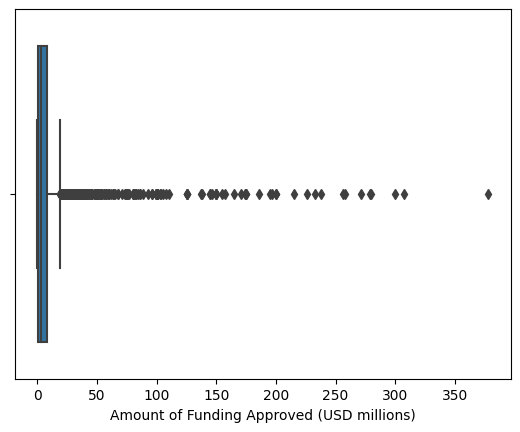

In [6]:
import seaborn as sns
sns.boxplot(x=df['Amount of Funding Approved (USD millions)'])

In [7]:
sample = df['Amount of Funding Approved (USD millions)']
zero_percentile = np.percentile(sample, 0.001)
ninetieth_percentile = np.percentile(sample, 95)

outliers = df[df['Amount of Funding Approved (USD millions)']>ninetieth_percentile]
#df.to_csv('/content/drive/My Drive/Datathon/Data/outliers.csv')
#outliers
print(len(outliers))

print(np.mean(df['Amount of Funding Approved (USD millions)']))
df['Amount of Funding Approved (USD millions)'] = np.where(sample<zero_percentile, zero_percentile, sample)
df['Amount of Funding Approved (USD millions)'] = np.where(df['Amount of Funding Approved (USD millions)']>ninetieth_percentile, ninetieth_percentile, df['Amount of Funding Approved (USD millions)'])
df = df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9]], axis=1)
print(np.mean(df['Amount of Funding Approved (USD millions)']))


160
9.422164349859008
6.67046596300454


In [8]:
# Train Test Split

X = df.loc[:, df.columns != 'Amount of Funding Approved (USD millions)']
X = pd.get_dummies(X, columns = ['categories'])
y = df.loc[:, df.columns.isin(['Amount of Funding Approved (USD millions)'])]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

In [9]:
# Scaling data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Initial Random Forest Regressor

rf = RandomForestRegressor(n_estimators=150, random_state=42, criterion='squared_error', max_depth = 20, max_features = 30)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9238267700344104
0.5000812752398187


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=250,learning_rate=0.01,random_state=42, max_depth=15, max_features=15, min_samples_split=3,min_samples_leaf=2)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))

0.9091318354488653
0.5076543847543242


In [12]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

estimators = [('rf', RandomForestRegressor(n_estimators=200, random_state=42, criterion='squared_error', max_depth = 20, max_features = 30)),
              ('gb', GradientBoostingRegressor(n_estimators=200,learning_rate=0.01,random_state=42, max_depth=10, max_features=20, min_samples_split=4,min_samples_leaf=2))
]

stacked = StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=0.1))

stacked.fit(X_train, y_train)
y_pred = stacked.predict(X_test)

print(stacked.score(X_train,y_train))
print(stacked.score(X_test,y_test))

0.8844374646212543
0.5149631153715956


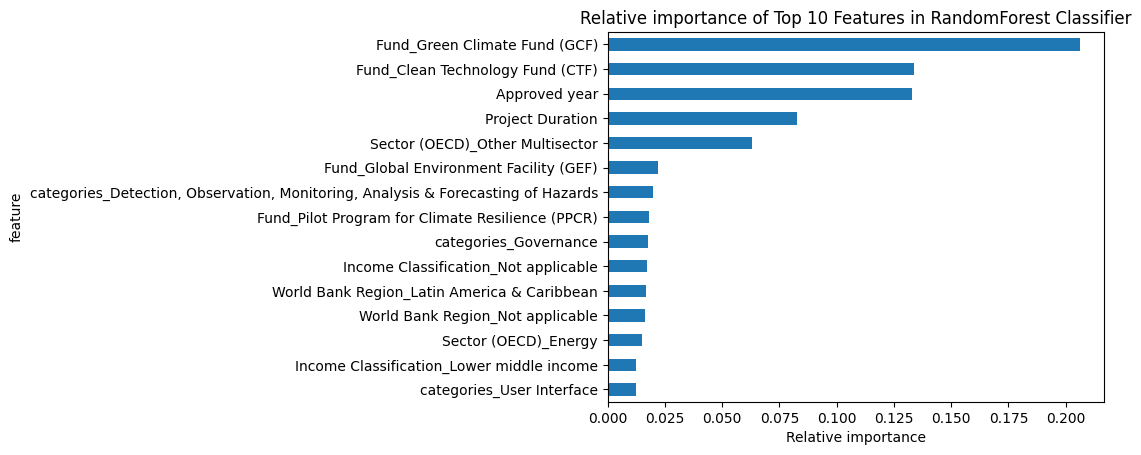

In [13]:
# Plotting Feature Relevance

feat_importances1 = pd.Series(rf.feature_importances_, index=X.columns)
top = feat_importances1.nlargest(15)
top.plot(kind='barh').invert_yaxis()

plt.yticks(fontsize=10)
plt.title("Relative importance of Top 10 Features in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature")
plt.show()

In [14]:
# Redoing models with selected top features

top_features = top.reset_index().values
use_features = []

# Defining columns of top features
for f in top_features:
  use_features.append(f[0])
print(use_features, '\n')
select_columns = []
for i in X.columns:
  select_columns.append(i)

# Selecting columns from X_train and X_test
X_train_df = pd.DataFrame(data=X_train, columns = select_columns)
X_test_df = pd.DataFrame(data=X_test, columns = select_columns)
X_train_select = X_train_df.loc[:, X_train_df.columns.isin(use_features)]
X_test_select = X_test_df.loc[:, X_test_df.columns.isin(use_features)]

# Refit model to new X_train and predict new X_test
rf = RandomForestRegressor(n_estimators=200, random_state=42, criterion='squared_error', max_depth = 20, max_features = 30)
rf.fit(X_train_select, y_train)
y_pred = rf.predict(X_test_select)

print(rf.score(X_train_select,y_train))
print(rf.score(X_test_select,y_test))

['Fund_Green Climate Fund (GCF)', 'Fund_Clean Technology Fund (CTF)', 'Approved year', 'Project Duration', 'Sector (OECD)_Other Multisector', 'Fund_Global Environment Facility (GEF)', 'categories_Detection, Observation, Monitoring, Analysis & Forecasting of Hazards', 'Fund_Pilot Program for Climate Resilience (PPCR)', 'categories_Governance', 'Income Classification_Not applicable', 'World Bank Region_Latin America & Caribbean', 'World Bank Region_Not applicable', 'Sector (OECD)_Energy', 'Income Classification_Lower middle income', 'categories_User Interface'] 

0.8701295673153749
0.41817084631411006


In [15]:
print(np.mean(y_pred))

7.090771834535265


NameError: ignored

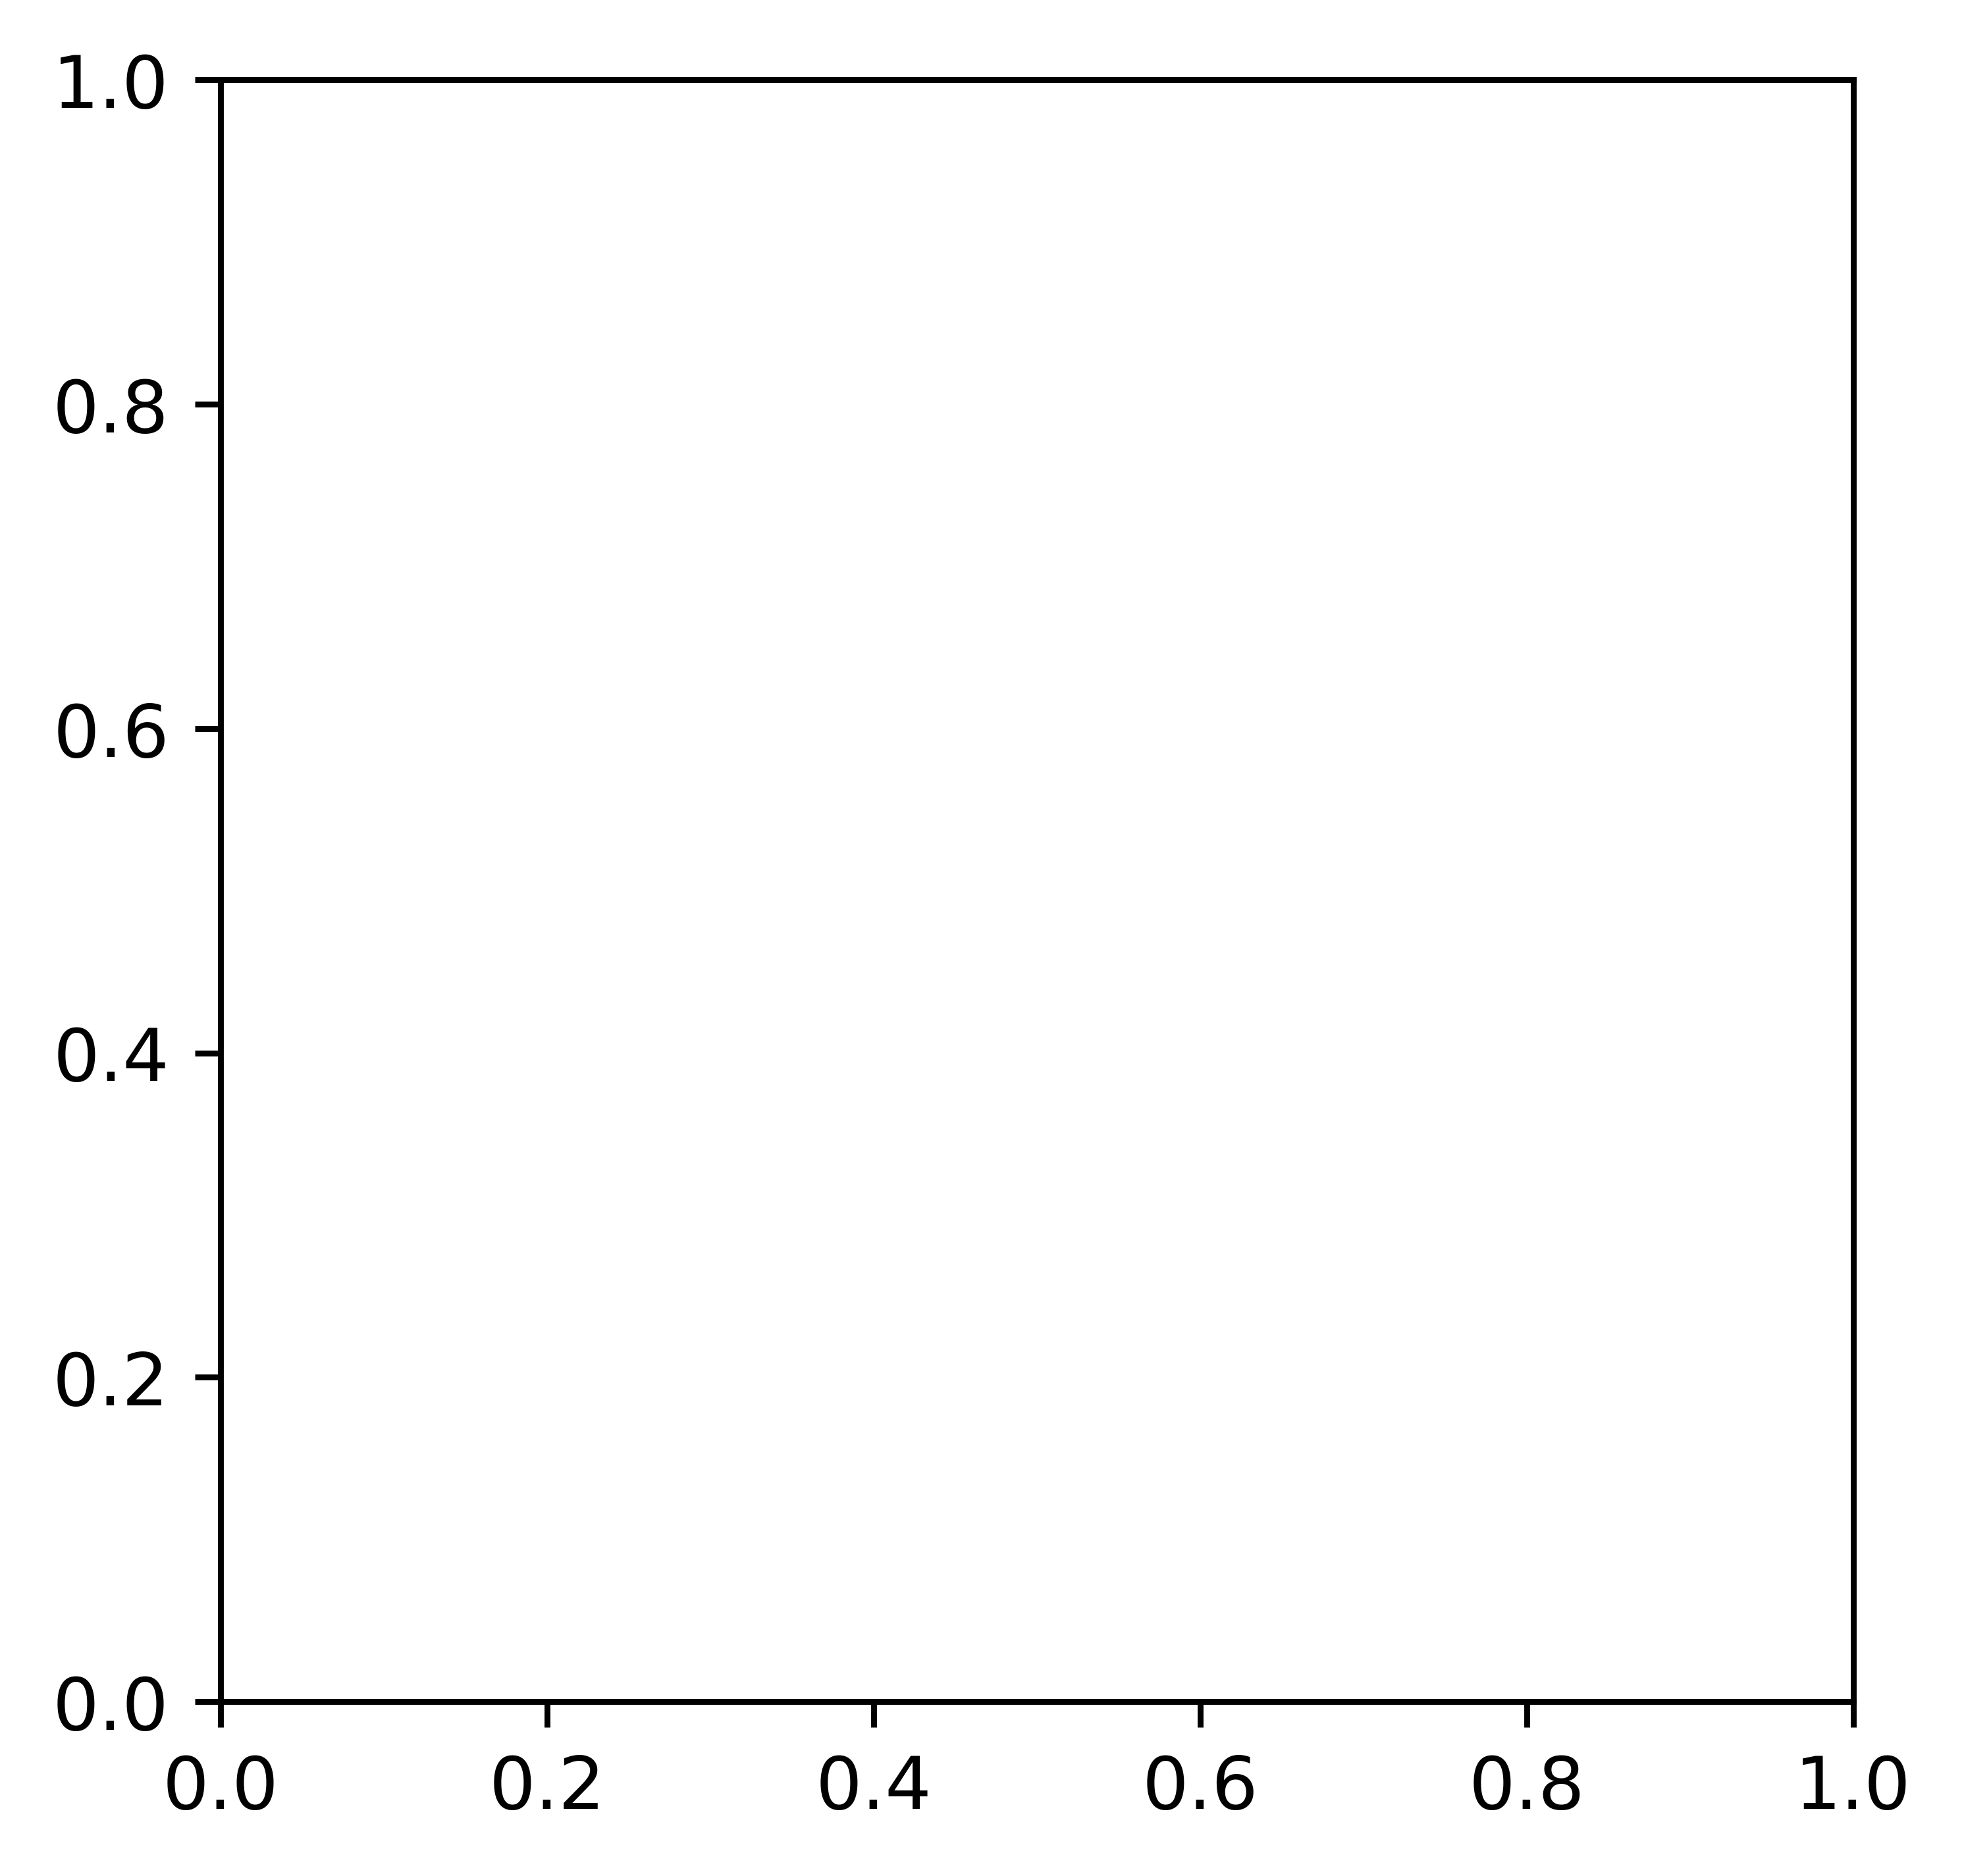

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = use_features,
               filled = True,
               rounded=True)
fig.savefig('rf_individualtree.png')